# Sidekick - Varying hyperparameters
We try in this notebook to perform the regression over a project by varying the hyperparameters accross time.

In [1]:
%matplotlib inline
import os
import sys
sys.path.insert(0, os.path.abspath('../utils/')) # Add sibling to Python path
sys.path.insert(0, os.path.abspath('../src/')) # Add sibling to Python path
sys.stdout.flush() # Print output on the fly in Notebook
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18,8)
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['legend.fontsize'] = 16
from IPython.display import display
import numpy as np
import gptools
import cPickle as cp
import matplotlib.pyplot as plt
from math import floor
from dataset import Sidekick
from misc_utils import progress

DATA_DIR = "../data/sidekick"

## Prepare data

In [2]:
sk = Sidekick()
project = sk['14035777']
threshold = 0.8
money = project.money
time, money = project.resample(money, N=100)
x_train, y_train, x_test, y_test = project.split(time, money, threshold)

## Train model
### Squared Exponential

In [ ]:
k = gptools.SquaredExponentialKernel(param_bounds=[(0, 1), (1, 400)])
gp = gptools.GaussianProcess(k)
gp.add_data(x_train, y_train)
gp.optimize_hyperparameters(random_starts=20)
gp.plot()

### Varying lengthscale

/Users/kristof/.virtualenvs/gp/lib/python2.7/site-packages/gptools/kernel/gibbs.py:144: RuntimeWarning: invalid value encountered in true_divide
  return sigmaf**2.0 * (scipy.sqrt(2.0 * li * lj / (li**2.0 + lj**2.0)) *
/Users/kristof/.virtualenvs/gp/lib/python2.7/site-packages/scipy/optimize/slsqp.py:62: RuntimeWarning: invalid value encountered in subtract
  jac[i] = (func(*((x0+dx,)+args)) - f0)/epsilon
/Users/kristof/.virtualenvs/gp/lib/python2.7/site-packages/gptools/kernel/gibbs.py:144: RuntimeWarning: invalid value encountered in true_divide
  return sigmaf**2.0 * (scipy.sqrt(2.0 * li * lj / (li**2.0 + lj**2.0)) *
/Users/kristof/.virtualenvs/gp/lib/python2.7/site-packages/gptools/kernel/gibbs.py:144: RuntimeWarning: invalid value encountered in true_divide
  return sigmaf**2.0 * (scipy.sqrt(2.0 * li * lj / (li**2.0 + lj**2.0)) *
/Users/kristof/.virtualenvs/gp/lib/python2.7/site-packages/numpy/lib/scimath.py:120: RuntimeWarning: invalid value encountered in less
  if any(isreal(x)

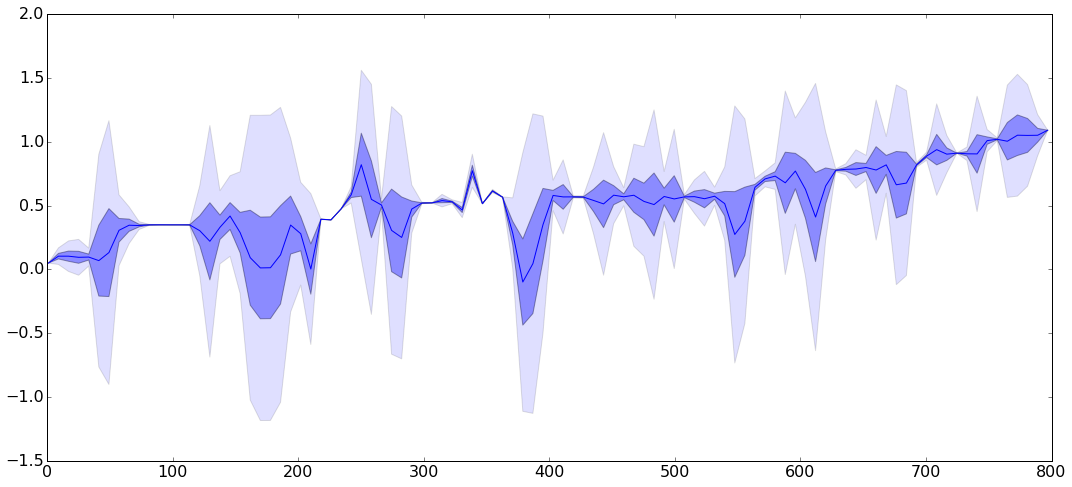

In [42]:
k = gptools.GibbsKernel1dGaussArb(param_bounds=[(0, 1), (0, 10), (0, 10), (0, 5), (0, len(x_train))])
gp = gptools.GaussianProcess(k)
gp.add_data(x_train, y_train)
gp.optimize_hyperparameters(random_starts=20)
sigmaf = gp.params[0]
l1 = gp.params[1]
l2 = gp.params[2]
lw = gp.params[3]
x0 = gp.params[4]
gp.plot()

## Plot lengthscale

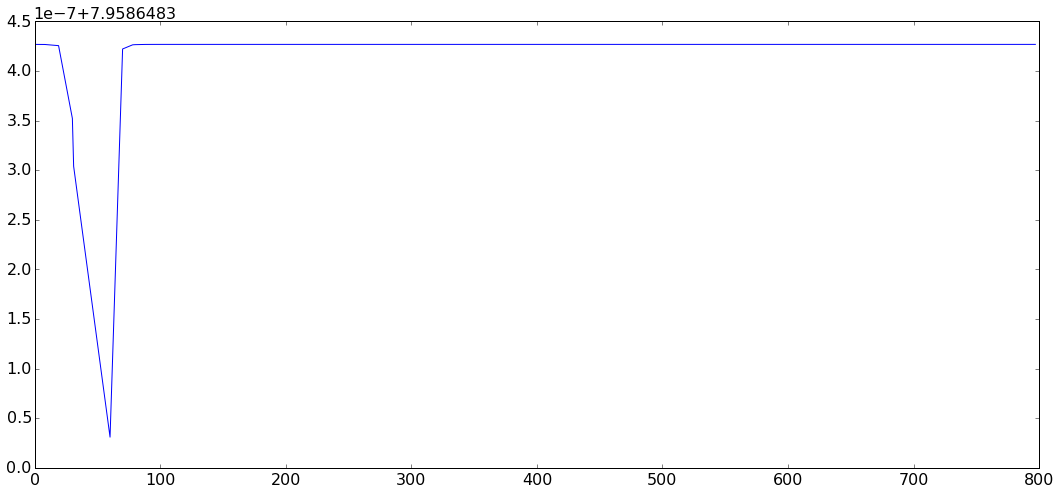

In [43]:
def l_tanh(x, l1, l2, lw, x0):
    return 0.5 * (l1+l2) - 0.5 * (l1 - l2)* np.tanh((x - x0) / lw)

def l_gauss(x, l1, l2, lw, x0):
    return l1 - (l1 - l2) * np.exp(-4*np.log(2 * ((x - x0)**2) / (lw**2)))

x = np.arange(0, 1000)
plt.plot(x_train, l_gauss(x_train, l1, l2, lw, x0))

### Plot prediction

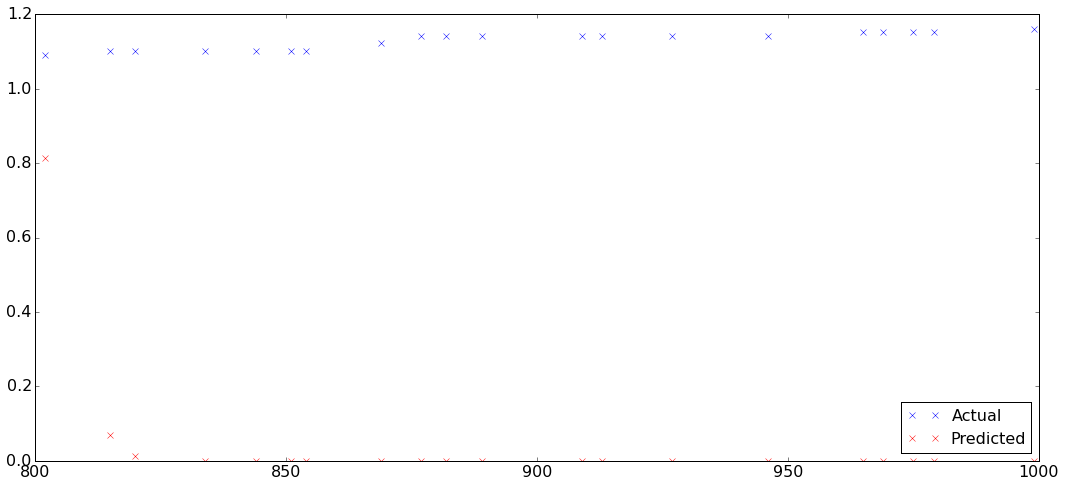

In [47]:
y_star, err_y_star = gp.predict(x_test)
plt.plot(x_test, y_test, 'xb')
plt.plot(x_test, y_star, 'xr')
plt.legend(('Actual', 'Predicted'), loc=4)